In [80]:
# Gym stuff
import gym
import gym_anytrading
# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C, PPO

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from trader import trader_agent
import cryptomanager as cm

from config import LOG_PATH, MODEL_PATH
from datetime import datetime
import os
test = trader_agent()

1


In [81]:
df = cm.historical_data_df(days_delta=10000)
print(df.dtypes)
df

1995-06-17 00:00:00
date     datetime64[ns, UTC]
Open                 float64
High                 float64
Low                  float64
Close                float64
dtype: object


,date,Open,High,Low,Close
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5
...,...,...,...,...,...
579171,2022-11-03 00:12:00+00:00,20135.0,20135.0,20131.0,20131.0
579172,2022-11-03 00:13:00+00:00,20124.0,20126.0,20124.0,20125.0
579173,2022-11-03 00:14:00+00:00,20126.0,20134.0,20126.0,20133.0
579174,2022-11-03 00:15:00+00:00,20134.0,20136.0,20134.0,20134.0


In [82]:
window_size = 100
lower_bound = len(df) - 250
upper_bound = len(df)
# df = pd.read_csv("data/gmedata.csv")
env = gym.make('stocks-v0', df=df, frame_bound=(lower_bound,upper_bound), window_size=window_size)
df

,date,Open,High,Low,Close
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5
...,...,...,...,...,...
579171,2022-11-03 00:12:00+00:00,20135.0,20135.0,20131.0,20131.0
579172,2022-11-03 00:13:00+00:00,20124.0,20126.0,20124.0,20125.0
579173,2022-11-03 00:14:00+00:00,20126.0,20134.0,20126.0,20133.0
579174,2022-11-03 00:15:00+00:00,20134.0,20136.0,20134.0,20134.0


info {'total_reward': -56.0, 'total_profit': 0.3860751460934177, 'position': 1}


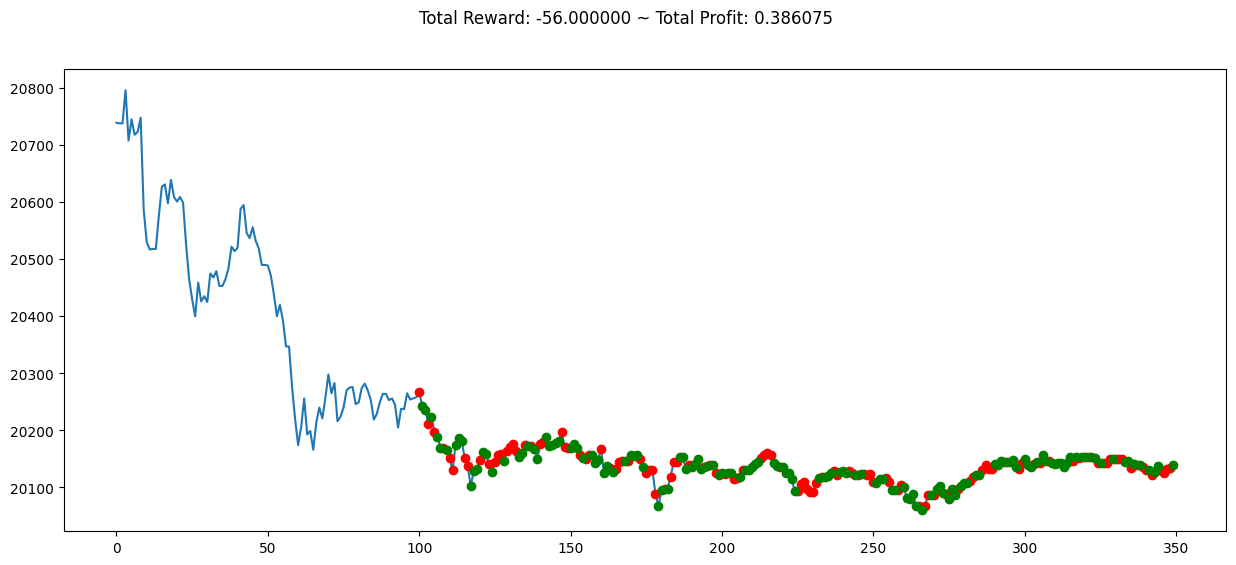

In [83]:
# Examining the model

state = env.reset()
while True: 
    # add a bit of randomness
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [84]:
# !pip install finta

In [85]:
from gym_anytrading.envs import StocksEnv, ForexEnv
from finta import TA

In [86]:
# df['OBV'] = TA.OBV(df)
df['EMA'] = TA.EMA(df, 200)
df['RSI'] = TA.RSI(df)
df.fillna(0, inplace=True)
df = df.join(TA.MACD(df))
df

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0,7314.000000,0.000000,0.000000,0.000000
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5,7207.218750,0.000000,-4.767628,-2.648682
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0,7171.121178,0.000000,-6.121420,-4.071935
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5,7157.767900,9.107921,-5.919194,-4.697701
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5,7278.289003,79.058101,19.384455,2.466196
...,...,...,...,...,...,...,...,...,...
579171,2022-11-03 00:12:00+00:00,20135.0,20135.0,20131.0,20131.0,20156.695027,43.289947,-4.019048,-2.742716
579172,2022-11-03 00:13:00+00:00,20124.0,20126.0,20124.0,20125.0,20156.379654,39.164795,-4.480414,-3.090256
579173,2022-11-03 00:14:00+00:00,20126.0,20134.0,20126.0,20133.0,20156.147021,46.486907,-4.152648,-3.302734
579174,2022-11-03 00:15:00+00:00,20134.0,20136.0,20134.0,20134.0,20155.926652,47.340117,-3.768756,-3.395939


In [87]:
df.head(15)

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0,7314.000000,0.000000,0.000000,0.000000
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5,7207.218750,0.000000,-4.767628,-2.648682
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0,7171.121178,0.000000,-6.121420,-4.071935
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5,7157.767900,9.107921,-5.919194,-4.697701
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5,7278.289003,79.058101,19.384455,2.466196
5,2020-04-29 03:18:00+00:00,7836.0,7836.0,7836.0,7836.0,7373.580045,81.219889,37.972569,12.090397
6,2020-04-30 12:48:00+00:00,8829.0,8829.0,8829.0,8829.0,7587.786410,91.696109,94.223816,32.876174
7,2020-04-30 12:56:00+00:00,8734.5,8734.5,8734.5,8734.5,7736.192393,86.737276,125.932608,55.239385
8,2020-05-01 00:00:00+00:00,8653.0,8653.0,8653.0,8653.0,7842.181898,82.589058,141.930720,75.265514
9,2020-05-01 05:31:00+00:00,8826.5,8826.5,8826.5,8826.5,7945.101892,84.309425,160.151292,94.284856


In [88]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close','EMA',"MACD","SIGNAL", 'RSI']].to_numpy()[start:end]
    return prices, signal_features

In [89]:
from enum import Enum

# class Actions(Enum):
#     Sell = 0
#     Buy = 1
#     # Hold = 2

from gym import spaces
class Cypto_Env(StocksEnv):
    _process_data = add_signals
    # StocksEnv.action_space = spaces.Discrete(len(Actions))

    

    
env2 = Cypto_Env(df=df, window_size=window_size, frame_bound=(lower_bound,upper_bound))
df.head()

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0,7314.000000,0.000000,0.000000,0.000000
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5,7207.218750,0.000000,-4.767628,-2.648682
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0,7171.121178,0.000000,-6.121420,-4.071935
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5,7157.767900,9.107921,-5.919194,-4.697701
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5,7278.289003,79.058101,19.384455,2.466196


In [90]:
env2.signal_features

array([[ 2.07390000e+04,  2.04996032e+04,  3.74449705e+01,
         3.85119006e+01,  6.31790293e+01],
       [ 2.07380000e+04,  2.05019753e+04,  3.83123239e+01,
         3.84719852e+01,  6.29873928e+01],
       [ 2.07380000e+04,  2.05043238e+04,  3.85552666e+01,
         3.84886415e+01,  6.29873928e+01],
       ...,
       [ 2.01330000e+04,  2.01561470e+04, -4.15264825e+00,
        -3.30273446e+00,  4.64869070e+01],
       [ 2.01340000e+04,  2.01559267e+04, -3.76875583e+00,
        -3.39593874e+00,  4.73401171e+01],
       [ 2.01400000e+04,  2.01557682e+04, -2.94640415e+00,
        -3.30603182e+00,  5.22585573e+01]])

In [91]:
df.head()

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0,7314.000000,0.000000,0.000000,0.000000
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5,7207.218750,0.000000,-4.767628,-2.648682
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0,7171.121178,0.000000,-6.121420,-4.071935
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5,7157.767900,9.107921,-5.919194,-4.697701
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5,7278.289003,79.058101,19.384455,2.466196


In [92]:

 
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [110]:
from config import LOG_PATH, MODEL_PATH
from datetime import datetime
import os
 
model = A2C('MlpPolicy', env, verbose=1, tensorboard_log=LOG_PATH, device="cuda") 


# model = A2C.load(path=os.path.join("data","model","2022-01-11-19-26-1.zip"),env=env, device="auto")
name = str(datetime.now().strftime("%Y-%d-%m-%H-%M") )
print(name)
episodes = 5
step_count = 1000
# for i in range (episodes):
#     model.learn(total_timesteps=step_count, tb_log_name=f"A2C-{name}"
#     )
#     model.save(f"{os.path.join(MODEL_PATH , name)}-{i + 1}.zip")

Using cpu device
2022-02-11-20-29


In [94]:
from datetime import timedelta
from collections import deque 
from trader import trader_agent
import time
import os
trade_me = trader_agent()
prev_min = 0
from IPython.display import clear_output
print(len(df)-lower_bound,len(df))

1
250 579176


In [99]:
obs = env.reset()
env2.frame_bound

test = env2.signal_features[window_size - lower_bound:upper_bound]
last_test = test[-window_size:]
last_test = last_test[np.newaxis, ...]


action = model.predict(last_test)

print(action)
print(obs)
print(last_test)
print(obs == last_test)
# print(test[0:5])

(array([0], dtype=int64), None)
[[[ 2.07380000e+04  2.05019753e+04  3.83123239e+01  3.84719852e+01
    6.29873928e+01]
  [ 2.07380000e+04  2.05043238e+04  3.85552666e+01  3.84886415e+01
    6.29873928e+01]
  [ 2.07960000e+04  2.05072261e+04  4.29330107e+01  3.93775153e+01
    6.92595011e+01]
  [ 2.07080000e+04  2.05092238e+04  3.88536590e+01  3.92727441e+01
    5.42408828e+01]
  [ 2.07450000e+04  2.05115698e+04  3.81663760e+01  3.90514705e+01
    5.83321294e+01]
  [ 2.07180000e+04  2.05136239e+04  3.50391159e+01  3.82489995e+01
    5.45026284e+01]
  [ 2.07230000e+04  2.05157072e+04  3.25885375e+01  3.71169071e+01
    5.50906083e+01]
  [ 2.07480000e+04  2.05180186e+04  3.22914913e+01  3.61518240e+01
    5.80124166e+01]
  [ 2.05870000e+04  2.05187050e+04  1.88474638e+01  3.26909519e+01
    3.99750219e+01]
  [ 2.05300000e+04  2.05188174e+04  3.55259929e+00  2.68632814e+01
    3.57383833e+01]
  [ 2.05170000e+04  2.05187993e+04 -9.50807913e+00  1.95890093e+01
    3.48316900e+01]
  [ 2.05180

In [96]:
# # model.load(os.path.join(MODEL_PATH, "2022-01-11-21-49-18.zip") , env = env)
# env = Cypto_Env(df=df, window_size=window_size, frame_bound=(len(df)-80,len(df)))
# obs = env.reset()
# pos_count = deque(maxlen=60)

# env.trade_fee_bid_percent = 0 # unit
# env.trade_fee_ask_percent = 0 # unit
# while True: 
#     try:
#         obs = obs[np.newaxis, ...]
#         action, _states = model.predict(obs)
#         obs, rewards, done, info = env.step(action)
#         cur_min = datetime.now().minute
#         print(action)
#         clear_output()
#         if done:
#             clear_output()
#             reward = env._total_reward

#             pos_count.append(action)
#             print(pos_count)
#             next_df = cm.historical_data_df()
#             next_df = next_df.loc[-100:]
#             next_df['EMA'] = TA.EMA(next_df, 200)
#             prev_min = cur_min
#             next_df['RSI'] = TA.RSI(next_df)
#             next_df.fillna(0, inplace=True)
#             next_df = next_df.join(TA.MACD(next_df))
#             df = pd.concat([df, next_df])
            
#             print(action[0])

#             if action == 1 or action[0] == 1:
#                 trade_me.buy_position_at_market("BTC/USD")
#                 print("b") 
#                 print(df["Low"].tail(1))
#             if action == 0 or action[0] == 0:
#                 trade_me.sell_position_market("BTCUSD")
#                 print("s")
#                 print(df["Low"].tail(1))
#             plt.figure(figsize=(10,6))
#             plt.cla()
#             env.render_all()
#             plt.show()
#             print("info", info)
#             obs = obs[np.newaxis, ...]
#             action, _states = model.predict(obs)
#             obs = env.reset()
#             env.df = df
#             env.frame_bound=(len(df)-lower_bound,len(df))
#             td = timedelta(seconds= 60 - datetime.now().second) 

#             print("waiting for the remainder of the minute")
#             time.sleep(td.total_seconds())
#             env._total_reward = reward
#     except Exception as e:
#         print(e)
#         break


# cur_min = datetime.now().minute

# td = timedelta(seconds= 60 - datetime.now().second) 
# # while True:
# print(td.total_seconds())
#     # if cur_min > prev_min:
#     #     prev_min = cur_min

In [97]:
# plt.figure(figsize=(15,6))
# plt.cla()
# env.render_all()
# plt.show()

In [108]:
past_trades = deque(maxlen=60)
prev_min = 0
while True:
    cur_min = datetime.now().minute
    try:
        if cur_min > prev_min:
            prev_min = cur_min
        # td = timedelta(seconds= 60 - datetime.now().second) 
        # time.sleep(td.total_seconds())
        next_df = cm.historical_data_df()
        next_df = next_df.loc[-100:]
        next_df['EMA'] = TA.EMA(next_df, 200)
        next_df['RSI'] = TA.RSI(next_df)
        next_df.fillna(0, inplace=True)
        next_df = next_df.join(TA.MACD(next_df))
        df = pd.concat([df, next_df])
        test_env = Cypto_Env(df=df, window_size=window_size, frame_bound=(lower_bound,upper_bound))

        obs = test_env.signal_features[window_size - lower_bound:upper_bound]
        obs = obs[-window_size:]
        action = model.predict(obs)
        if action == 1 or action[0] == 1:
            trade_me.buy_position_at_market("BTC/USD")
            print("b") 
            print(df["Low"].tail(1))
            past_trades.append(action)
        if action == 0 or action[0] == 0:
            trade_me.sell_position_market("BTCUSD")
            print("s")
            print(df["Low"].tail(1))
            past_trades.append(action)
        for episode in range(episodes):
            model = model.learn(total_timesteps=step_count, tb_log_name= f"A2C-{str(time.time())}")
            model.save(os.path.join(MODEL_PATH, str(time.time())))
            clear_output()
            print("past trades: ", list(past_trades))
    except Exception as e:
        print(e)


past trades:  [(array(1, dtype=int64), None)]
buying  BTC/USD
b
1079    20164.0
Name: Low, dtype: float64
Logging to ./data\log\A2C-1667435376.4336889_1
-------------------------------------
| time/                 |           |
|    fps                | 569       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.000485 |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13173     |
|    policy_loss        | 1.09e-12  |
|    value_loss         | 1.18e-14  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 548       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.000485 |
|    explai

KeyboardInterrupt: 